In [212]:
import pandas as pd
df = pd.read_csv('train.csv')

import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Noto Sans KR')
# plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

In [213]:
import seaborn as sns
sns.set_theme(font='Malgun Gothic', style='dark')
#옵션별로 사용가능

In [214]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [215]:
df.shape #행렬갯수확인
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [216]:
df.isnull().sum() #null값확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [217]:
df['Survived'].head()
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [218]:
df.value_counts('Survived', normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

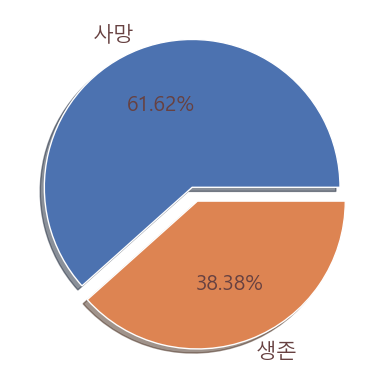

In [219]:
df = pd.read_csv('train.csv')
group = df.groupby('Survived').size()
group
labels=['사망','생존']
plt.pie(group.values, labels = labels, autopct='%.2f%%',
        shadow= True, 
        textprops={'color':"#674141", 'fontsize':15},
        explode=[0.05]*len(group))
plt.show()

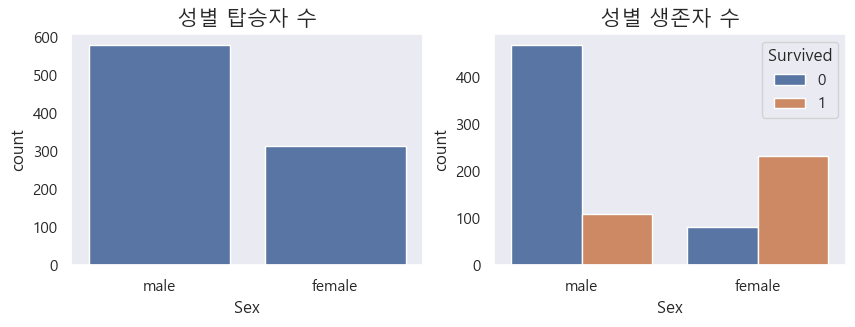

In [220]:
fig, axs =plt.subplots(1,2, figsize=(10,3))
#첫번째그래프# axs[0,0] #axs[0]도 가능
axs[0].set_title('성별 탑승자 수', size=15)
sns.countplot(x='Sex', data=df, ax=axs[0])

# 두번째그래프, axs[0,1]
axs[1].set_title('성별 생존자 수', size=15)
sns.countplot(x='Sex', hue='Survived', data=df, ax=axs[1])
plt.show()

In [221]:
#성별생존율
#성별전체인원
gender = df.groupby('Sex').size().to_frame('전체탑승자수')
gender

,전체탑승자수
Sex,
female,314
male,577


In [222]:
filt=df['Survived']==1
gender_survived = df[filt].groupby('Sex').size().to_frame('성별생존자수')
gender_survived 

,성별생존자수
Sex,
female,233
male,109


In [223]:
#동일인덱스-join
join = gender_survived.join(gender)
join

,성별생존자수,전체탑승자수
Sex,,
female,233,314
male,109,577


In [224]:
#생존율
join['생존율'] = join['성별생존자수']/join['전체탑승자수']*100
join

,성별생존자수,전체탑승자수,생존율
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


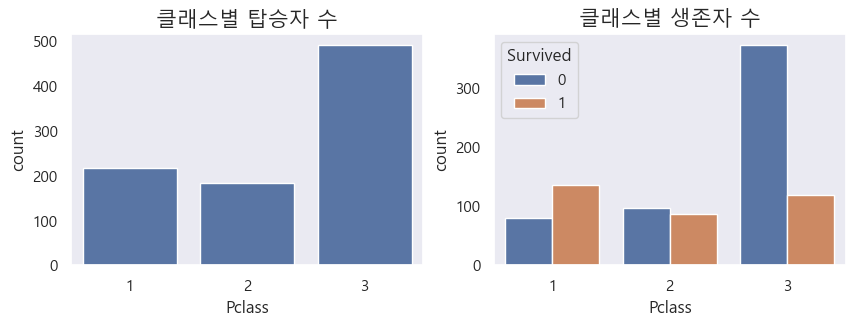

In [225]:
fig, axs =plt.subplots(1,2, figsize=(10,3))
#첫번째그래프# axs[0,0] #axs[0]도 가능
axs[0].set_title('클래스별 탑승자 수', size=15)
sns.countplot(x='Pclass', data=df, ax=axs[0])

# 두번째그래프, axs[0,1]
axs[1].set_title('클래스별 생존자 수', size=15)
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axs[1])
plt.show()

In [226]:
#탑승클래스별 생존율
df['Pclass'].unique() #pclass 값확인
#전체탑승자수
pclass = df.groupby('Pclass').size().to_frame('전체탑승자수')
pclass

,전체탑승자수
Pclass,
1,216
2,184
3,491


In [227]:
filt=df['Survived']==1
p_survived = df[filt].groupby('Pclass').size().to_frame('클래스별생존자수')
p_survived 

,클래스별생존자수
Pclass,
1,136
2,87
3,119


In [228]:
#동일인덱스-join
join = p_survived.join(pclass)
join

,클래스별생존자수,전체탑승자수
Pclass,,
1,136,216
2,87,184
3,119,491


In [229]:
#생존율
join['생존율'] = join['클래스별생존자수']/join['전체탑승자수']*100
join

,클래스별생존자수,전체탑승자수,생존율
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


In [230]:
#연령대별
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [231]:
sns.set_theme(font='Malgun Gothic', style='darkgrid')

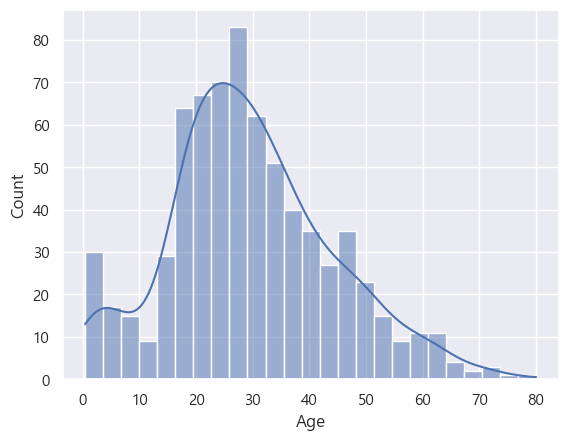

In [232]:
#연령대별 분포도 #kde밀도
sns.histplot(data=df, x='Age', bins=25, kde=True)
plt.show()

In [233]:
#연령대별 사망자/생존자 그래프

survived = df[df['Survived']==1]
dead = df[df['Survived']==0]


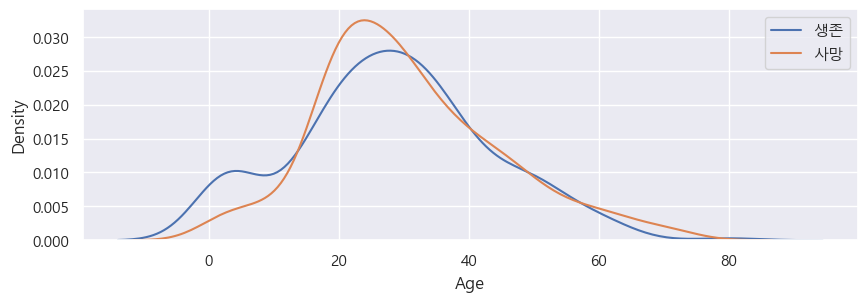

In [234]:
plt.figure(figsize=(10,3))
sns.kdeplot(survived['Age'],label='생존')
sns.kdeplot(dead['Age'],label='사망')
plt.legend()
plt.show()

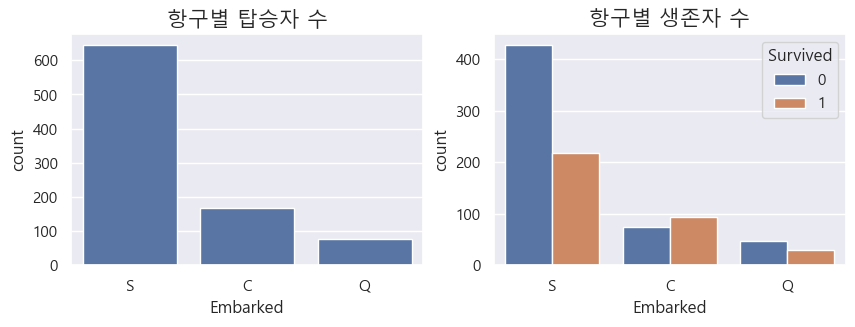

In [235]:
fig, axs =plt.subplots(1,2, figsize=(10,3))
#첫번째그래프# axs[0,0] #axs[0]도 가능
axs[0].set_title('항구별 탑승자 수', size=15)
sns.countplot(x='Embarked', data=df, ax=axs[0])

# 두번째그래프, axs[0,1]
axs[1].set_title('항구별 생존자 수', size=15)
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axs[1])
plt.show()

In [236]:
#전체탑승자수
embarked = df.groupby('Embarked').size().to_frame('전체탑승자수')
filt=df['Survived']==1
e_survived = df[filt].groupby('Embarked').size().to_frame('항구별생존자수')
join = e_survived.join(embarked)
join['생존율'] = join['항구별생존자수']/join['전체탑승자수']
join

,항구별생존자수,전체탑승자수,생존율
Embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957


In [237]:
#항구별,Pclass별 
c1 = df[df['Pclass']==1].value_counts('Embarked')
c2 = df[df['Pclass']==2].value_counts('Embarked')
c3 = df[df['Pclass']==3].value_counts('Embarked')
pclass = pd.DataFrame([c1,c2,c3])
pclass.index=['1등급','2등급','3등급']
pclass.columns=['S항구','C항구','Q항구']
pclass

,S항구,C항구,Q항구
1등급,127,85,2
2등급,164,17,3
3등급,353,66,72


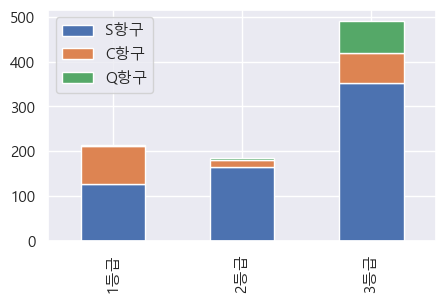

In [242]:
fig, ax = plt.subplots(figsize=(5,3))
pclass.plot(kind='bar', stacked=True, ax=ax)
plt.show()

In [239]:
#항구별,Pclass별 
es = df[df['Embarked']=='S'].value_counts('Pclass')
ec = df[df['Embarked']=='C'].value_counts('Pclass')
eq = df[df['Embarked']=='Q'].value_counts('Pclass')
em = pd.DataFrame([es,ec,eq])
em.index=['S항구','C항구','Q항구']
em.columns=['3등석','2등석','1등석']
em

,3등석,2등석,1등석
S항구,353,164,127
C항구,66,17,85
Q항구,72,3,2


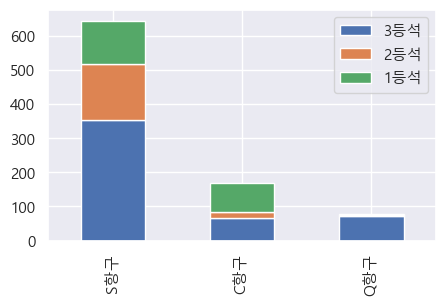

In [240]:
fig, ax = plt.subplots(figsize=(5,3))
em.plot(kind='bar', stacked=True, ax=ax)
plt.show()

In [241]:
#전체탑승자수
embarked = df.groupby('Embarked').size().to_frame('전체탑승자수')
filt=df['Survived']==1
e_survived = df[filt].groupby('Embarked').size().to_frame('항구별생존자수')
join = e_survived.join(embarked)
join['생존율'] = join['항구별생존자수']/join['전체탑승자수']
join

,항구별생존자수,전체탑승자수,생존율
Embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957
